#**1. Diagnostico Inicial**

In [209]:
from pathlib import Path
import pandas as pd

ROOT = Path.cwd()
DATA = ROOT / 'data'
RAW = DATA / 'raw'
PROCESSED = DATA / 'processed'
EXTERNAL = DATA / 'external'

for d in (RAW, PROCESSED, EXTERNAL):
    d.mkdir(parents=True, exist_ok=True)

###Reflexión
Creamos las carpetas necesarias del proyecto para tener una mejor gestion y orden.


##1.1 Cargamos el fichero, convertimos a columnas numericas las requeridas y convertimos a datatime las fechas

In [210]:
# Lectura del fichero
fichero = RAW / 'S5 - clientes_reto.csv'
clientes_raw = pd.read_csv(fichero, encoding='utf-8', na_values=['NA', '-', '—', 'X', ''],
                           usecols=['id', 'edad', 'genero', 'ingresos_mensuales', 'ingresos_anuales', 'ciudad',
                                    'fecha_alta', 'estado_civil',
                                    'hijos', 'contrato', 'fecha_fin'],
                           dtype={'id': 'Int64', 'edad': 'Int64', 'genero': 'string', 'ingresos_mensuales': 'float',
                                  'ingresos_anuales': 'float', 'ciudad': 'string', 'estado_civil': 'string',
                                  'hijos': 'Int64', 'contrato': 'string'}, parse_dates=['fecha_alta', 'fecha_fin'],
                           )
clientes_raw

,id,edad,genero,ingresos_mensuales,ingresos_anuales,ciudad,fecha_alta,estado_civil,hijos,contrato,fecha_fin
0,1,48,<NA>,2180.21,25462.550000,Sevilla,2023-04-16,Casado,0,indefinido,NaT
1,2,36,M,1931.77,23420.850000,Madrid,2019-08-10,Divorciado,0,temporal,2020-09-04
2,3,48,F,1819.20,22380.990000,Valencia,2024-09-26,Casado,3,indefinido,NaT
3,4,30,M,2264.20,27967.910000,Madrid,2023-04-13,Soltero,3,indefinido,NaT
4,5,<NA>,M,2865.67,13715.271422,Zaragoza,2020-12-04,Casado,0,indefinido,2024-11-22
...,...,...,...,...,...,...,...,...,...,...,...
819,573,56,F,3082.58,NaN,Madrid,2021-04-20,Soltero,1,indefinido,NaT
820,239,61,<NA>,3597.13,42957.350000,<NA>,2019-06-22,Casado,0,indefinido,NaT
821,517,42,<NA>,2931.98,34243.920000,Sevilla,2023-07-04,<NA>,0,temporal,2025-06-29
822,83,52,<NA>,3043.45,36138.220000,Malaga,2019-11-22,Viudo,2,indefinido,NaT


###Reflexión
En la lectura del fichero y la creacion del DataFrame aprovechamos para convertir las tablas señaladas a numéricas o a tipo Date.

##1.2 Explorar su estructura (info(), describe() y head())

In [211]:
print('INFO:')
clientes_raw.info()

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  824 non-null    Int64         
 1   edad                773 non-null    Int64         
 2   genero              712 non-null    string        
 3   ingresos_mensuales  809 non-null    float64       
 4   ingresos_anuales    810 non-null    float64       
 5   ciudad              806 non-null    string        
 6   fecha_alta          824 non-null    datetime64[ns]
 7   estado_civil        794 non-null    string        
 8   hijos               824 non-null    Int64         
 9   contrato            824 non-null    string        
 10  fecha_fin           305 non-null    datetime64[ns]
dtypes: Int64(3), datetime64[ns](2), float64(2), string(4)
memory usage: 73.4 KB


In [212]:
print('DESCRIBE:')
clientes_raw.describe()

DESCRIBE:


,id,edad,ingresos_mensuales,ingresos_anuales,fecha_alta,hijos,fecha_fin
count,824.0,773.0,809.000000,810.000000,824,824.0,305
mean,399.73301,47.690815,2753.062571,29858.143200,2022-02-22 05:47:46.019417344,1.14199,2023-09-21 07:23:48.196721408
min,1.0,-3.0,50.000000,0.000000,2019-01-01 00:00:00,0.0,2019-07-24 00:00:00
25%,201.75,32.0,1734.310000,20311.834920,2020-07-31 18:00:00,0.0,2022-04-12 00:00:00
50%,399.5,46.0,2285.590000,27186.165000,2022-01-29 12:00:00,1.0,2023-08-29 00:00:00
75%,597.25,60.0,2822.250000,34245.007500,2023-08-01 00:00:00,2.0,2025-03-16 00:00:00
max,800.0,160.0,100000.000000,678292.913777,2026-12-30 00:00:00,5.0,2029-11-13 00:00:00
std,229.84531,19.580877,6906.824987,33274.106385,NaN,1.31557,NaN


In [213]:
print('HEAD:')
clientes_raw.head()

HEAD:


,id,edad,genero,ingresos_mensuales,ingresos_anuales,ciudad,fecha_alta,estado_civil,hijos,contrato,fecha_fin
0,1,48,<NA>,2180.21,25462.550000,Sevilla,2023-04-16,Casado,0,indefinido,NaT
1,2,36,M,1931.77,23420.850000,Madrid,2019-08-10,Divorciado,0,temporal,2020-09-04
2,3,48,F,1819.20,22380.990000,Valencia,2024-09-26,Casado,3,indefinido,NaT
3,4,30,M,2264.20,27967.910000,Madrid,2023-04-13,Soltero,3,indefinido,NaT
4,5,<NA>,M,2865.67,13715.271422,Zaragoza,2020-12-04,Casado,0,indefinido,2024-11-22


##1.3 Detectar valores pseudonulos/nulos

In [214]:
print('Nulos por Columna:')
clientes_raw.isna().sum()

Nulos por Columna:


,0
id,0
edad,51
genero,112
ingresos_mensuales,15
ingresos_anuales,14
ciudad,18
fecha_alta,0
estado_civil,30
hijos,0
contrato,0


##1.4 Sustituir valores nulos

In [215]:
from sklearn.impute import SimpleImputer

clientes_limpio = clientes_raw.copy()

# Creamos Imputers
imp_mean = SimpleImputer(strategy='mean')
imp_moda = SimpleImputer(strategy='most_frequent')

# Sustituimos nulos por columna
medianas = ['id', 'edad']
for x in medianas:
    clientes_limpio[x] = clientes_limpio[x].fillna(clientes_limpio[x].median())

medias = ['ingresos_mensuales', 'ingresos_anuales']
for x in medias:
    clientes_limpio[x] = imp_mean.fit_transform(clientes_limpio[[x]]).ravel()

desconocidos = ['genero', 'ciudad', 'estado_civil', 'contrato']
for x in desconocidos:
    clientes_limpio[x] = clientes_limpio[x].fillna('Desconocido')

clientes_limpio['fecha_alta'] = clientes_limpio['fecha_alta'].astype(object)
clientes_limpio['fecha_alta'] = imp_moda.fit_transform(clientes_limpio[['fecha_alta']]).ravel()
clientes_limpio['fecha_alta'] = pd.to_datetime(clientes_limpio['fecha_alta'])

clientes_limpio['hijos'] = clientes_limpio['hijos'].fillna(0)

clientes_limpio.isna().sum()

,0
id,0
edad,0
genero,0
ingresos_mensuales,0
ingresos_anuales,0
ciudad,0
fecha_alta,0
estado_civil,0
hijos,0
contrato,0


###Reflexión
En caso de tener un nulo se aplicaran las siguentes reglas:
- Si es en el nombre, ciudad, estdo civil o contrato, se sustituye por "Desconocido", para agrupar los elementos nulos en un dato legible.
- Si es en el hijo, se sustituye por 0, ya que si es nulo no se consta ningun registro.
- Si es en el id o edad, se sustituye por su mediana, para mantener el tipo de las columnas y manejar bien los datos faltantes.
- Si es en los ingresos, se sustituye por su media, asi se mantiene la media de los ingresos y a su vez se eliminan los datos vacios.
- Si es en la fecha de alta, se sustituye por la fecha más común, manteniendo la estructura mas comun dentro de los datos.

#**2. Tratamiento de duplicados, outliers y reglas de consistencia**

##2.1 Detección y eliminación de duplicados

In [216]:
# Deteccion de duplicados
print(f'Numero de Duplicados: {clientes_limpio.duplicated().sum()}')

Numero de Duplicados: 17


In [217]:
# Eliminacion de duplicados
clientes_limpio = clientes_limpio.drop_duplicates()

print(f'Numero de Duplicados tras Eliminicación: {clientes_limpio.duplicated().sum()}')

Numero de Duplicados tras Eliminicación: 0


In [218]:
# Deteccion de duplicados parciales
print(f'Numero de Duplicados Parciales: {clientes_limpio.duplicated(subset=["id"], keep=False).sum()}')

Numero de Duplicados Parciales: 14


In [219]:
#Eliminación de los registros duplicados parciales
clientes_limpio = clientes_limpio.drop_duplicates(subset='id')

print(f'Numero de Duplicados Parciales tras Eliminicación: {clientes_limpio.duplicated(subset=["id"], keep=False).sum()}')

Numero de Duplicados Parciales tras Eliminicación: 0


###Relexión
Si se haya un valor duplicado o un duplicado parcial en el id, solo se mantendra el primero de los duplicados.

Mantenemos el primero de los datos duplicados, ya que suponemos que el registro mas antiguo y por ende valido, es el inicial.

##2.2 Detectamos Outliers y los borramos

Numero de outliers en edad: 9


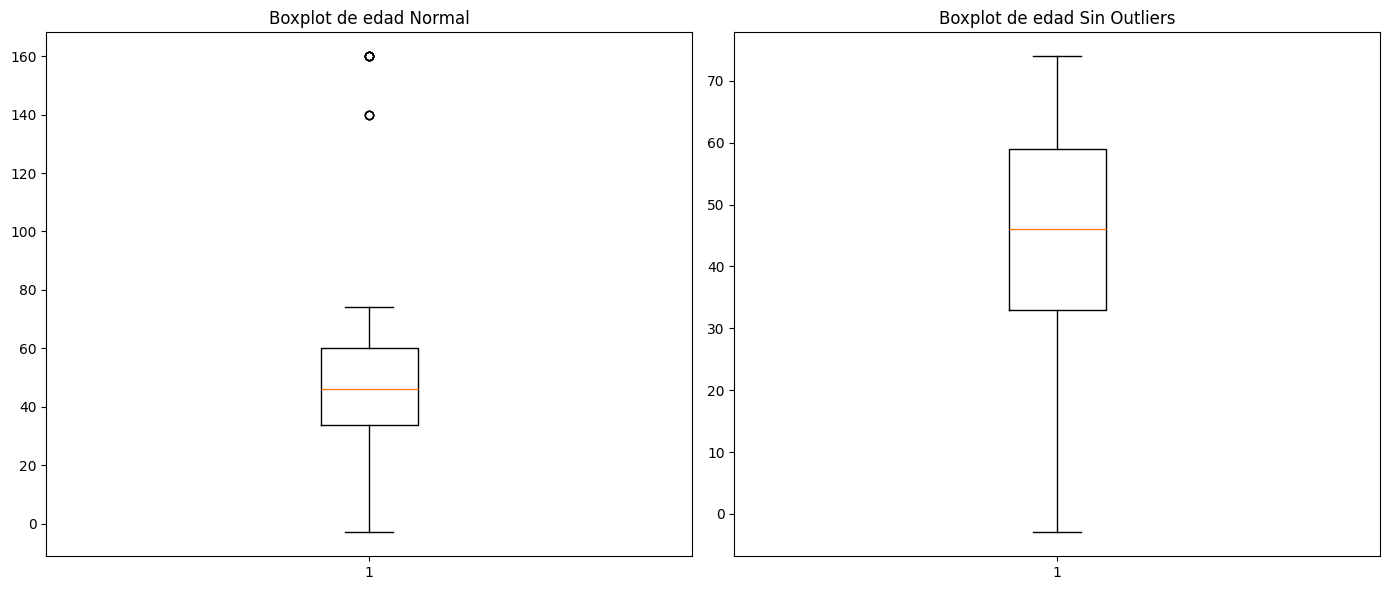

In [220]:
# Outliers de edad
import matplotlib.pyplot as plt


def sacar_outliers(columna):
    Q1 = clientes_limpio[columna].quantile(0.25)
    Q3 = clientes_limpio[columna].quantile(0.75)

    IQR = Q3 - Q1

    limite_sup = Q3 + 1.5 * IQR
    limite_inf = Q1 - 1.5 * IQR

    outliers = clientes_limpio[
        (clientes_limpio[columna] < limite_inf) | (clientes_limpio[columna] > limite_sup)]
    return outliers


def borrar_outliers(df, outliers, columna):
    print(f'Numero de outliers en {columna}: {len(outliers)}')

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].boxplot(df[columna])
    ax[0].set_title(f'Boxplot de {columna} Normal')

    # Borramos outliers de edad
    new_df = df.drop(outliers.index)

    ax[1].boxplot(new_df[columna])
    ax[1].set_title(f'Boxplot de {columna} Sin Outliers')

    plt.tight_layout()

    plt.show()
    return new_df


outliers_edad = sacar_outliers('edad')
clientes_limpio = borrar_outliers(clientes_limpio, outliers_edad, 'edad')

Numero de outliers en ingresos_mensuales: 14


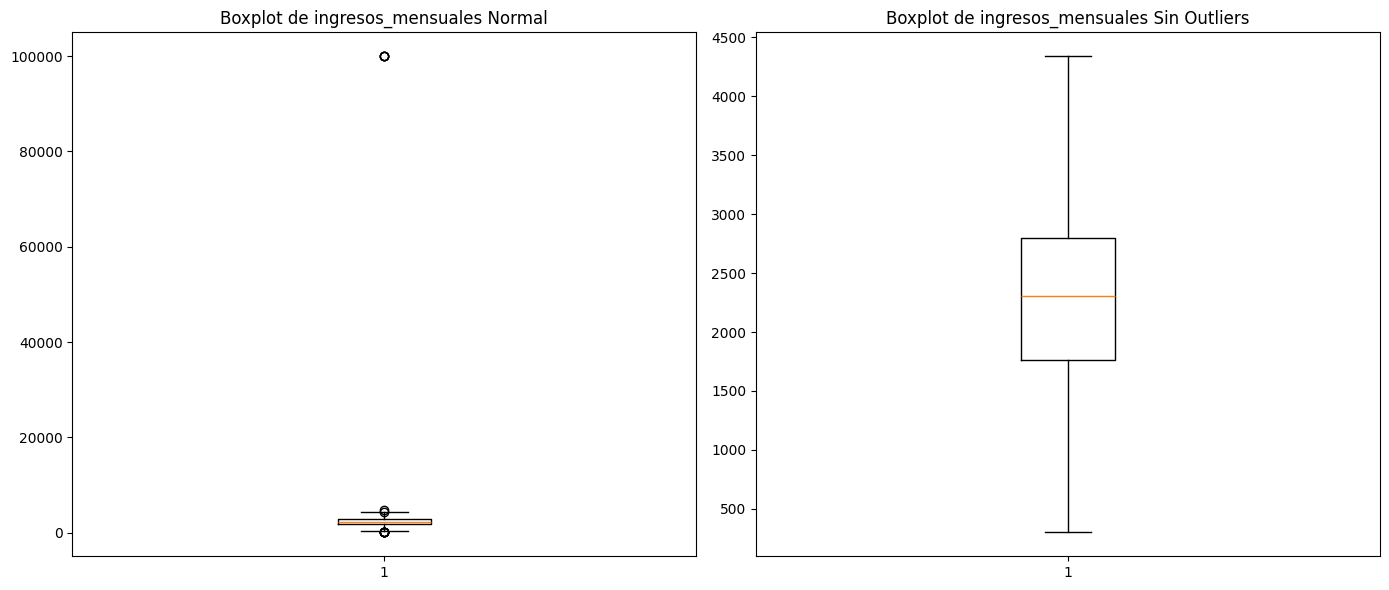

In [221]:
# Outliers ingresos_mensuales
outliers_ingresos_mensuales = sacar_outliers('ingresos_mensuales')
clientes_limpio = borrar_outliers(clientes_limpio, outliers_ingresos_mensuales, 'ingresos_mensuales')

Numero de outliers en ingresos_anuales: 24


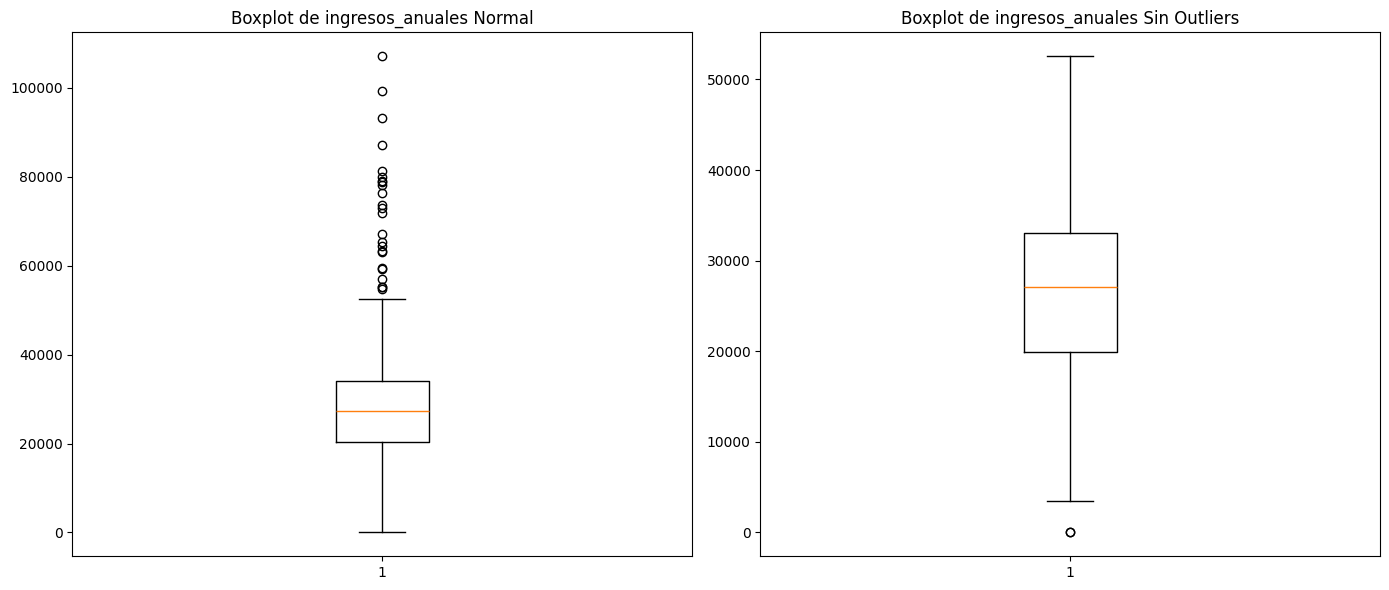

In [222]:
# Outliers ingresos_anuales
outliers_ingresos_anuales = sacar_outliers('ingresos_anuales')
clientes_limpio = borrar_outliers(clientes_limpio, outliers_ingresos_anuales, 'ingresos_anuales')

###**Apunte*
Como no se han validado los datos, en el outlier de ingresos anuales se genera un outlier nuevo despues de su previa eliminación.
No obstante, al ser un dato poco realista en la posterior validación se eliminara.

Numero de outliers en hijos: 0


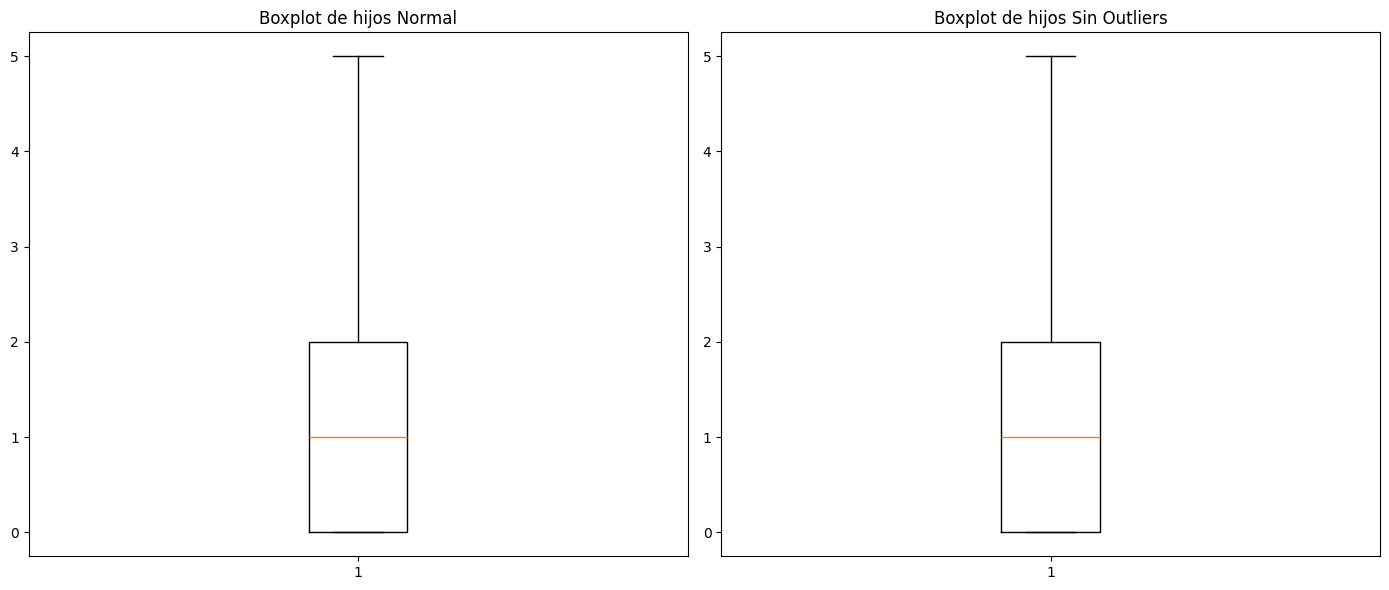

In [223]:
# Outliers hijos
outliers_hijos = sacar_outliers('hijos')
clientes_limpio = borrar_outliers(clientes_limpio, outliers_hijos, 'hijos')

###Reflexión
Se eliminan todos los outliers tanto superiores como inferiores para un mayor realismo en los datos.

##2.3 Aplicamos reglas de validación por columnas

In [224]:
# Funciones de validacion
from datetime import datetime

def validar_edad(df, nombre_columna = 'edad'):
  return df[~((0 <= df[nombre_columna]) & (df[nombre_columna] <= 120))]

def validar_genero(df, nombre_columna = 'genero'):
  generos = ['M', 'F']
  return df[~((df[nombre_columna].isin(generos)))]

def validar_ingresos(df):
  return df[~((df['ingresos_anuales'].between(df['ingresos_mensuales'] * 12 * 0.95, df['ingresos_mensuales'] * 12 * 1.05)))]

def validar_contratos(df):
  return df[((df['contrato'] == 'indefinido') & ~df['fecha_fin'].isna())]

def validar_fecha_futura(df, fecha_inicio = 'fecha_inicio', fecha_fin = 'fecha_fin'):
    hoy = pd.to_datetime(datetime.now().date())

    df_limpio = df.dropna(subset=['fecha_fin'])
    return pd.DataFrame(data=pd.concat([
        df_limpio[~(df_limpio[fecha_inicio] < df_limpio[fecha_fin])],
        df[df[fecha_inicio] > hoy]
    ]))

In [225]:
# Edades fuera del rango
incos_edad = validar_edad(clientes_limpio, 'edad')
print(f'Numero de datos con edades inconsistentes: {len(incos_edad)}')

Numero de datos con edades inconsistentes: 1


In [226]:
# Generos fuera del rango
incos_genero = validar_genero(clientes_limpio, 'genero')
print(f'Numero de datos con generos inconsistentes: {len(incos_genero)}')

Numero de datos con generos inconsistentes: 101


In [227]:
# Ingresos inconsistentes
incos_ingresos = validar_ingresos(clientes_limpio)
print(f'Numero de datos con ingresos inconsistentes: {len(incos_ingresos)}')

Numero de datos con ingresos inconsistentes: 58


In [228]:
# Contratos inconsistentes
incos_contratos = validar_contratos(clientes_limpio)
print(f'Numero de datos con contratos inconsistentes: {len(incos_contratos)}')

Numero de datos con contratos inconsistentes: 37


In [229]:
# Fechas inconsistentes
incos_fechas = validar_fecha_futura(clientes_limpio, 'fecha_alta', 'fecha_fin')
print(f'Numero de datos con fechas inconsistentes: {len(incos_fechas)}')

Numero de datos con fechas inconsistentes: 33


In [230]:
# Agrupamos las inconsitencias y sacamos las filas a eliminar
inconsitencias = pd.concat([incos_edad, incos_genero, incos_ingresos, incos_contratos, incos_fechas]).drop_duplicates()
filas_a_eliminar = clientes_limpio[clientes_limpio.index.isin(inconsitencias.index)].index

# Eliminamos las inconsistencia
clientes_limpio = clientes_limpio.drop(filas_a_eliminar)
clientes_limpio

,id,edad,genero,ingresos_mensuales,ingresos_anuales,ciudad,fecha_alta,estado_civil,hijos,contrato,fecha_fin
1,2,36,M,1931.77,23420.85,Madrid,2019-08-10,Divorciado,0,temporal,2020-09-04
2,3,48,F,1819.20,22380.99,Valencia,2024-09-26,Casado,3,indefinido,NaT
3,4,30,M,2264.20,27967.91,Madrid,2023-04-13,Soltero,3,indefinido,NaT
5,6,21,F,1536.71,18527.98,Zaragoza,2021-05-08,Soltero,0,indefinido,NaT
6,7,37,M,2072.09,24494.41,Malaga,2024-08-16,Casado,3,temporal,2025-01-02
...,...,...,...,...,...,...,...,...,...,...,...
794,795,40,F,1236.70,15211.43,Malaga,2022-08-06,Soltero,1,indefinido,NaT
795,796,46,M,4170.12,48663.29,Valencia,2021-05-16,Divorciado,1,temporal,2023-04-24
796,797,57,M,2413.12,28496.75,Bilbao,2019-07-27,Soltero,1,indefinido,NaT
798,799,28,F,2803.52,34048.05,Sevilla,2021-12-17,Casado,4,indefinido,NaT


###Relexión
Se eliminan los reguistros con los siguentes criterios:
- Los géneros con diferentes valores a "M" y "F", para posibles futuros estudios de la empresa.
- Las edades mayores a 120, por su valor poco realista.
- Las fechas que tienen fin antes de que inicien o que inicien en el futuro, por su valor ilógico.
- Los ingresos anuales y mensuales que no tiene correlación o con una diferencia notable, por su irregularidad.

#**3. Imputación y preparación final**

##3.1 Normalización del DataSet

In [231]:
for x in ['edad', 'ingresos_mensuales', 'ingresos_anuales']:
  clientes_limpio[f'{x}_norm'] = (clientes_limpio[x] - clientes_limpio[x].min()) / (clientes_limpio[x].max() - clientes_limpio[x].min())


clientes_limpio

,id,edad,genero,ingresos_mensuales,ingresos_anuales,ciudad,fecha_alta,estado_civil,hijos,contrato,fecha_fin,edad_norm,ingresos_mensuales_norm,ingresos_anuales_norm
1,2,36,M,1931.77,23420.85,Madrid,2019-08-10,Divorciado,0,temporal,2020-09-04,0.321429,0.403863,0.405898
2,3,48,F,1819.20,22380.99,Valencia,2024-09-26,Casado,3,indefinido,NaT,0.535714,0.376002,0.384709
3,4,30,M,2264.20,27967.91,Madrid,2023-04-13,Soltero,3,indefinido,NaT,0.214286,0.486140,0.498551
5,6,21,F,1536.71,18527.98,Zaragoza,2021-05-08,Soltero,0,indefinido,NaT,0.053571,0.306086,0.306198
6,7,37,M,2072.09,24494.41,Malaga,2024-08-16,Casado,3,temporal,2025-01-02,0.339286,0.438593,0.427773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,795,40,F,1236.70,15211.43,Malaga,2022-08-06,Soltero,1,indefinido,NaT,0.392857,0.231833,0.238619
795,796,46,M,4170.12,48663.29,Valencia,2021-05-16,Divorciado,1,temporal,2023-04-24,0.5,0.957856,0.920248
796,797,57,M,2413.12,28496.75,Bilbao,2019-07-27,Soltero,1,indefinido,NaT,0.696429,0.522998,0.509326
798,799,28,F,2803.52,34048.05,Sevilla,2021-12-17,Casado,4,indefinido,NaT,0.178571,0.619622,0.622442


###Reflexión
Se muestra a cuanta distancia se encuentra del minimo y maximo cada entrada, en general esta opcion suele ser mas visual al traspasar los datos a valores mas simples, aunque se pierde legibilidad del dato real, esta opcion es mas comun en el desarrollo de modelos de lenguaje.

Para ello se han creado nuevas columnas de esta forma no se pierden datos y se tiene toda la informacion unificada para su facil uso.

##3.2 Exportación del DataSet limpio

In [232]:
export = PROCESSED / 'clientes_reto_clean.csv'

clientes_limpio.to_csv(
    export,
    index=False,
    encoding='utf-8',
    na_rep='',
)

##Reflexión Final
Se ha cumplido con todos los criterios propuestos y se han realizado las tareas en su totalidad.

Por lo que nuestra nota deberia rondar el **sobresaliente**.